# The correlation between the rise in CO2 and the rise in global temperature
# Using Python for data analytic and visualization

First, I import a few major Python libraries for data science, namely **pandas**, **numpy**, and **matplotlib**.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

<AxesSubplot:title={'center':'Mauna Loa CO2 Annual Mean 2000-2020'}, xlabel='Years', ylabel='Annual CO2 mean (ppm)'>

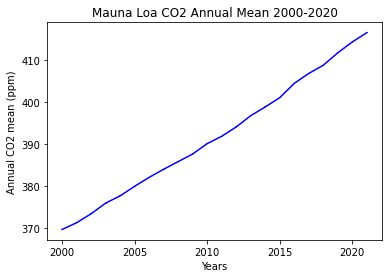

In [98]:
co2Mean = pd.read_csv("co2_annmean_mlo.csv", skiprows = range(97), engine = 'python',
                        names = ["Year", "Mean", "Uncertainty", "Growth"]) # Create a new column Growth when reading the csv file
df_co2 = pd.DataFrame(co2Mean)
df_co2 = df_co2.set_index("Year")
df_co2["Mean"].plot(color = 'blue', yerr = df_co2.Uncertainty, xlabel = 'Years', ylabel ='Annual CO2 mean (ppm)', 
                    title = 'Mauna Loa CO2 Annual Mean 2000-2020') 


### Projection of the annual mean of CO2 from 2022-2040 based on available data from 2000-2021
Assuming that a year's growth rate is the average of the previous three years' growth rates.  
A year's growth rate is calculated by taking the difference between the mean CO2 of two consecutive years and dividing it by the CO2 amount of the former year.

Based on this projection model, the forecasted CO2 concentration in our atmosphere in 2040 is 466.3059775869478


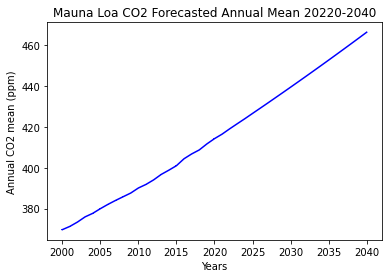

In [99]:
# Create a column of growth rate for the years with existing data 2000-2021
for i in range(2001,2022):
     df_co2.at[i,"Growth"] = (df_co2.at[i,"Mean"] - df_co2.at[i-1,"Mean"])/df_co2.at[i-1,"Mean"]

# Create new rows for 2020-2040
# Populate forecasted growth rates for 2020-2040; each year's growth rate is the average of the previous three years' rates
for i in range(2022,2041):
     df_co2.at[i,"Growth"] = (df_co2.at[i-3,"Growth"]+df_co2.at[i-2,"Growth"]+df_co2.at[i-1,"Growth"])/3 
     # Looking for a prettier way to calculate the mean
     # I want to slice out a group of three cell values in the Growth column
     # df_co2.at[2022,"Growth"] = statistics.mean(df_co2.at[2019:2021,"Growth"]) # Not work


# Populate forecasted CO2 means for 2020-2040 based on the forecasted growth rates
for i in range(2022,2041):
     df_co2.at[i,"Mean"] = df_co2.at[i-1,"Mean"]*(1+df_co2.at[i,"Growth"])

# Plot the Annual CO2 mean from 2000 to 2040     
df_co2["Mean"].plot(color = 'blue', yerr = df_co2.Uncertainty, xlabel = 'Years', ylabel ='Annual CO2 mean (ppm)', 
                    title = 'Mauna Loa CO2 Forecasted Annual Mean 20220-2040')

print(f"Based on this projection model, the forecasted CO2 concentration in our atmosphere in 2040 is ", end = "")
print(df_co2.loc[2040]["Mean"]) # Extract the CO2 data of year 2040 from the data frame

In [100]:
# Example data frame created from scratch
import pandas as pd
technologies = {
     'Year':[2000,2001,2002],
     'Mean' :[369.71,371.32,373.45]
          }

df = pd.DataFrame(technologies)
df = df.set_index("Year")
df["NewCol"] = 0
# df.at[2000,"NewCol"] = 1

# The row index is now the default numbers starting from 0
for i in range(2000,2002):
     df.at[i,"NewCol"] = (df.at[i+1,"Mean"] - df.at[i,"Mean"])/df.at[i,"Mean"] # Change the value of each cell
print(df)


        Mean    NewCol
Year                  
2000  369.71  0.004355
2001  371.32  0.005736
2002  373.45  0.000000


### Project global temperature rise based on the forecasted CO2 rise
"The invaluable, predictive value of the Hansen approach has been proven in this review, with evidence from the past to the present. It has been shown to be superior to many other climate probability models, mainly due to the discovery that the correlated global temperature increase and long term sea level rise can now be accurately predicted with ease by anyone, using Equations (1) or (2), simply based on CO2 concentration amounts in parts per million, up to 500 or 600 ppm where a divergence begins in the correlation, with increasing nonlinearity as the thermal response begins to lag behind as it departs from the linear, proportional relationship." (Valone, T. 2021)

I use the equation found in the research paper "Linear Global Temperature Correlation to Carbon Dioxide Level, Sea Level, and Innovative Solutions to a Projected 6°C Warming by 2100." (Valone, T. 2021) to predict the global temperature change based on the changes of CO2 concentration.  
**𝛥𝐶=𝛥𝑇×20=𝛥𝑆**  
The linear relationship is predicted to be accurate up to around 500-600ppm of CO2 where a divergence begins.
This equation is derived from James Hansen graphs of CO2 and MIT's table of data points derived from Hansen graphs. 



## Citation
Valone, T. (2021) Linear Global Temperature Correlation to Carbon Dioxide Level, Sea Level, and Innovative Solutions to a Projected 6°C Warming by 2100. Journal of Geoscience and Environment Protection, 9, 84-135. doi: 10.4236/gep.2021.93007.